# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import sys
# This allows us to import the nucml utilities
sys.path.append("../")

In [3]:
import nucml.exfor.data_utilities as exfor_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.endf.data_utilities as endf_utils
import nucml.datasets as nuc_data
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(nuc_data)
print("Finish importing scripts.")

Finish importing scripts.


In [4]:
sns.set(font_scale=2)
sns.set_style('white')

In [5]:
figure_dir = "Figures/"

# Loading EXFOR data

In [6]:
# df = nuc_data.load_exfor(basic=True)
df, x_train, x_test, y_train, y_test, to_scale, scaler = nuc_data.load_exfor(
    log=True, low_en=True, num=True, filters=True, scaling_type="standard")

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: -1
INFO:root: SCALER: STANDARD
INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\EXFOR\CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 104)
INFO:root:Dropping unnecessary features and one-hot encoding categorical columns...
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.


# Loading Chlorine Data

In [7]:
# chlorine_35 = exfor_utils.load_exfor_samples(df, 17, 35, "103", one_hot=False)
chlorine_35 = exfor_utils.load_samples(df, 17, 35, "MT_103", one_hot=True)

INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 144)


# Reading Flux

In [8]:
from scipy.io import loadmat

In [9]:
x = loadmat('SERPENT/MCFR_detector.mat')

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\scipy\io\matlab\mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [10]:
# Loading LBNL new chlorine measurments
new_data = endf_utils.load_new("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv")

INFO:root:Finish reading ENDF data with shape: (12, 4)


In [11]:
# load_endf() extracts ENDF data from ML_Data directory
endf_cl = nuc_data.load_endf("Cl035", "MT103", mev_to_ev=True, mb_to_b=True, drop_u=True, log=True)

INFO:root:ENDF: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:ENDF: Converting MeV to eV...
INFO:root:ENDF: Converting mb to b...
INFO:root:ENDF: Finished. ENDF data contains 8791 datapoints.


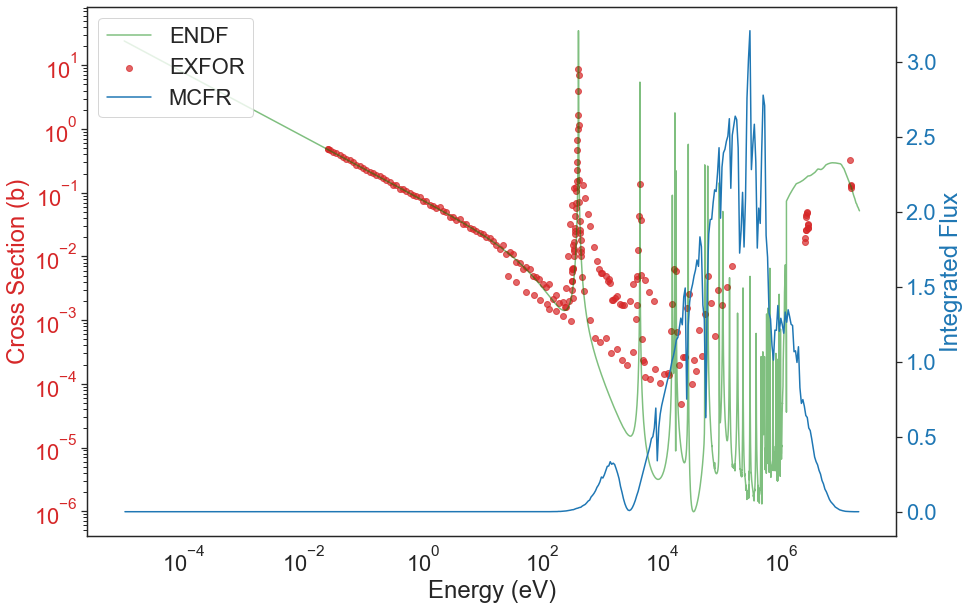

In [24]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(14,9))

color = 'tab:red'
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (b)', color=color)
ax1.scatter(10**chlorine_35.Energy, 10**chlorine_35.Data, color=color, alpha=0.7, label="EXFOR")
ax1.scatter(new_data.Energy, new_data.Data, color=color, alpha=0.7) #, label="J.C.Batchelder, et. al. 2019")
ax1.plot(10**endf_cl.Energy, 10**endf_cl.Data, color='green', alpha=0.5, label="ENDF")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Integrated Flux', color=color)  # we already handled the x-label with ax1
ax2.plot(x["DETEnergyDetectorE"][:,2]*1E6, x["DETEnergyDetector"][:,10], color=color, label="MCFR")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yscale('log')
ax2.set_xscale('log')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(figure_dir, "MCFR_EXFOR_Flux.png"), bbox_inches='tight', dpi=600)
plt.show()

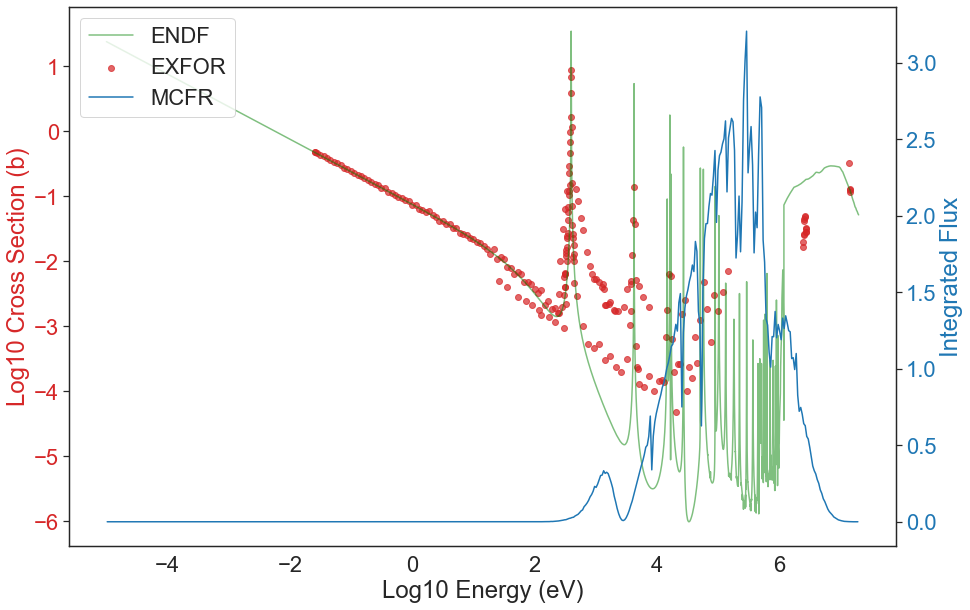

In [12]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(14,9))

color = 'tab:red'
ax1.set_xlabel('Log10 Energy (eV)')
ax1.set_ylabel('Log10 Cross Section (b)', color=color)
ax1.scatter(chlorine_35.Energy, chlorine_35.Data, color=color, alpha=0.7, label="EXFOR")
ax1.scatter(np.log10(new_data.Energy), np.log10(new_data.Data), color=color, alpha=0.7) #, label="J.C.Batchelder, et. al. 2019")
ax1.plot(endf_cl.Energy, endf_cl.Data, color='green', alpha=0.5, label="ENDF")
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Integrated Flux', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log10(x["DETEnergyDetectorE"][:,2]*1E6), x["DETEnergyDetector"][:,10], color=color, label="MCFR")
ax2.tick_params(axis='y', labelcolor=color)


# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(figure_dir, "MCFR_EXFOR_Flux.png"), bbox_inches='tight', dpi=600)
plt.show()